In [5]:
#import csv file from local machine
from google.colab import files
uploaded = files.upload()

Saving listings.csv to listings (1).csv


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

In [0]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['listings.csv']))

In [8]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,...,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Roslindale,...,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,$65.00,$400.00,NaN,$95.00,$10.00,0,$0.00,2,15,a week ago,NaN,26,54,84,359,2016-09-06,36,2014-06-01,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,t,moderate,f,f,1

##**Understanding the Business**


> From the data fetched from AirBnb Dataset we address following problems. Although there exists numerous problems, I have focused this project on how can we use the data to extract information related to neighbourhoods:


1.   Which host has most number of listings in a neighbourhood?
2.   Analyzing neighbourhood according to top rated listings.
3.   Analyzing neighbourhood according to top and most frequently rated for value listings.
4.   What is the best type of rooms in each neighbourhood?







##**Understanding the Data**

Since there is no need for explicitly collecting data, in this step we try to look into the data for:


*   The total number of rows and columns
*   Check for null values columns
*   Get Columns of interests for above problem:


      1.   host_id,neighbourhood
      2.   neighbourhood,review_scores_rating,id
      3.   neighbourhood,review_scores_value,id,number_of_reviews
      4.   neighbourhood,room_type,review_scores_rating





In [9]:
#get total number of columns and rows
df.shape

(3585, 95)

In [74]:
#check for set of columns with null data
df.columns[df.isnull().any()]

Index(['summary', 'space', 'neighborhood_overview', 'notes', 'transit',
       'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url',
       'xl_picture_url', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_neighbourhood',
       'neighbourhood', 'neighbourhood_group_cleansed', 'city', 'zipcode',
       'market', 'property_type', 'bathrooms', 'bedrooms', 'beds',
       'square_feet', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'has_availability', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'jurisdiction_names',
       'reviews_per_month'],
      dtype='object')

##**Preparing the Data**

In this step we analyze our columns of interests briefly.

In [14]:
df['neighbourhood'].value_counts()

Allston-Brighton      364
Jamaica Plain         314
South End             298
Back Bay              291
Fenway/Kenmore        249
South Boston          216
Dorchester            195
Beacon Hill           174
North End             125
East Boston           117
Roxbury               116
Mission Hill          103
Charlestown            79
Chinatown              78
West End               68
Roslindale             50
West Roxbury           35
Theater District       33
Downtown Crossing      26
Hyde Park              25
Mattapan               20
Financial District     13
Somerville             13
Downtown                8
Leather District        8
Brookline               8
Cambridge               7
Chestnut Hill           4
Government Center       3
Harvard Square          2
Name: neighbourhood, dtype: int64

In [16]:
df['room_type'].value_counts()

Entire home/apt    2127
Private room       1378
Shared room          80
Name: room_type, dtype: int64

##**Business Question 1: Which host has most number of listings in a neighbourhood?**

To solve this question we have to further unwrangle the data such that we get number of listings for each host in every neighbourhood. Next, from acquired data, we extract the host id with maximum number of listings and, also it's corresponding number.

In [17]:
#groupby neighbourhood and count host_id within a neighbourhood - unwrangling
df.groupby('neighbourhood')['host_id'].value_counts()

neighbourhood     host_id 
Allston-Brighton  26956083    20
                  12243051    18
                  30489899     9
                  8139434      6
                  9189449      6
                              ..
West Roxbury      61861112     1
                  65498878     1
                  68502098     1
                  69086583     1
                  75909219     1
Name: host_id, Length: 1999, dtype: int64

In [18]:
#create a new dataframe with unstacked values for the above code cell
#unsacking is done because we need to get maximum-valued column
Best_host_by_region=df.groupby('neighbourhood')['host_id'].value_counts(ascending=False).unstack()
Best_host_by_region.head()

host_id,4240,4804,8021,8061,8229,16701,25188,26988,38440,38997,50866,55603,63525,68870,71783,85770,93112,93916,95959,97805,97821,113091,115522,119019,119381,120731,122982,128280,157679,159160,167745,170480,174986,178829,183065,184232,197327,204485,205107,206353,...,86931675,86955930,87245627,88129265,88157615,88521075,88543034,88908642,89089164,89209244,89230454,89613233,89873768,90052719,90216774,90491687,90497470,90526463,90540199,91070657,91096414,91099010,91169115,91197438,91411121,91548283,91831056,91855319,91968083,92648590,92663980,92712021,93031650,93035834,93115614,93364702,93512984,93635490,93674064,93820834
neighbourhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Allston-Brighton,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN
Back Bay,NaN,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Beacon Hill,NaN,NaN,NaN,NaN,NaN,NaN,2.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
Brookline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cambridge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#get host-ids with maximum value
maxValuesObj = Best_host_by_region.idxmax(axis=1)
maxValuesObj

neighbourhood
Allston-Brighton      26956083
Back Bay                 25188
Beacon Hill           22348222
Brookline              5350366
Cambridge             17476640
Charlestown            3432624
Chestnut Hill         91855319
Chinatown             30283594
Dorchester            16442921
Downtown               3137257
Downtown Crossing     20857768
East Boston           25938928
Fenway/Kenmore        30283594
Financial District      178829
Government Center      1760577
Harvard Square        12243051
Hyde Park             16052189
Jamaica Plain          1480518
Leather District       3169119
Mattapan               1997048
Mission Hill          30283594
North End              5578043
Roslindale            13226301
Roxbury                1444340
Somerville            19246369
South Boston          30283594
South End             22348222
Theater District       2356643
West End              30283594
West Roxbury          43544288
dtype: int64

In [20]:
#get max number of lisgtings 
maxValuesObj = Best_host_by_region.max(axis=1)
maxValuesObj

neighbourhood
Allston-Brighton      20.0
Back Bay              27.0
Beacon Hill           13.0
Brookline              1.0
Cambridge              1.0
Charlestown            4.0
Chestnut Hill          2.0
Chinatown             30.0
Dorchester            14.0
Downtown               3.0
Downtown Crossing      4.0
East Boston            7.0
Fenway/Kenmore        53.0
Financial District     1.0
Government Center      1.0
Harvard Square         2.0
Hyde Park              4.0
Jamaica Plain          4.0
Leather District       2.0
Mattapan               4.0
Mission Hill          10.0
North End             10.0
Roslindale             3.0
Roxbury                9.0
Somerville             3.0
South Boston          15.0
South End             26.0
Theater District       6.0
West End              17.0
West Roxbury           5.0
dtype: float64

####***Final result for Business Question 1:***

In [75]:
#collate all data to get final result
host_with_max_listings=pd.DataFrame({'power_host' : Best_host_by_region.idxmax(axis=1),'number_of_listings' : Best_host_by_region.max(axis=1).astype(int)}).reset_index()
host_with_max_listings

,neighbourhood,power_host,number_of_listings
0,Allston-Brighton,26956083,20
1,Back Bay,25188,27
2,Beacon Hill,22348222,13
3,Brookline,5350366,1
4,Cambridge,17476640,1
5,Charlestown,3432624,4
6,Chestnut Hill,91855319,2
7,Chinatown,30283594,30
8,Dorchester,16442921,14
9,Downtown,3137257,3


##**Business Question 2: Analyzing neighbourhood according to top rated listings.**
To analyze this we create a new dataframe which filters out ratings whcih have value >90 with columns of interest ('review_scores_rating','neighbourhood','id'), then group them by neighbourhood with counts of the ratings.

The results is plotted for better visualization

In [76]:
#get unstacked value for ratings data grouped according to neighbourhood and count the rating
top_neighbourhoods=pd.DataFrame(df[df.review_scores_rating>90][['review_scores_rating','neighbourhood','id']].groupby('neighbourhood')['review_scores_rating'].value_counts().unstack())
top_neighbourhoods

review_scores_rating,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
neighbourhood,,,,,,,,,,
Allston-Brighton,10.0,12.0,18.0,12.0,24.0,17.0,14.0,13.0,1.0,60.0
Back Bay,9.0,13.0,17.0,3.0,10.0,17.0,14.0,8.0,7.0,43.0
Beacon Hill,7.0,6.0,16.0,8.0,10.0,13.0,7.0,12.0,4.0,36.0
Brookline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
Charlestown,1.0,2.0,4.0,2.0,8.0,6.0,4.0,5.0,5.0,14.0
Chestnut Hill,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Chinatown,2.0,2.0,2.0,1.0,3.0,2.0,2.0,1.0,NaN,15.0
Dorchester,4.0,3.0,18.0,6.0,6.0,11.0,12.0,5.0,3.0,32.0
Downtown,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN


In [23]:
#create a new dataframe which will select maximum listings who have the highest rating
max_rating_in_a_neighbourhoods=pd.DataFrame({'top_rating' : top_neighbourhoods.idxmax(axis=1),'number_of_listings_with_max_ratings' : top_neighbourhoods.max(axis=1).astype(int)}).reset_index()
max_rating_in_a_neighbourhoods.sort_values(ascending=False,by=['top_rating'])

,neighbourhood,top_rating,number_of_listings_with_max_ratings
0,Allston-Brighton,100.0,60
1,Back Bay,100.0,43
26,West End,100.0,7
25,Theater District,100.0,4
24,South End,100.0,61
23,South Boston,100.0,49
22,Somerville,100.0,2
21,Roxbury,100.0,17
19,North End,100.0,24
18,Mission Hill,100.0,10


####***Final result for Business Question 2:***

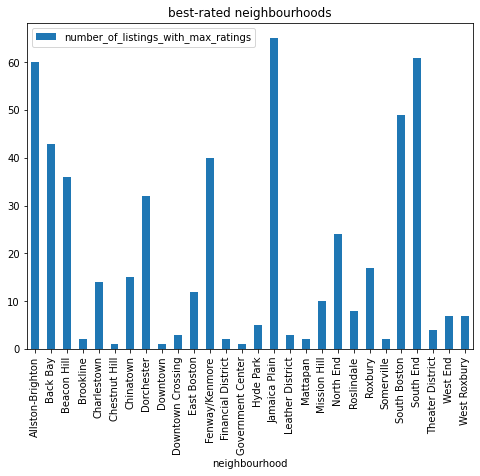

In [40]:
max_rating_in_a_neighbourhoods.plot(x='neighbourhood',y='number_of_listings_with_max_ratings',kind='bar',title='best-rated neighbourhoods',figsize=(8,6))

##**Business Question 3: Analyzing neighbourhood according to top and most frequently rated for value listings.**

To analyze this, we firstly, filter out the listings with maximum review_scores_value as well as maximum number of reviews, then the reulsting data is grouped by neighbourhood and number of listing for each neighbourhood is counted

In [71]:
#get not null listings with review_scores_value>8 and number_of_reviews>150
top_neighbourhoods_listings_byvalue=pd.DataFrame(df.query(' review_scores_value>8 & number_of_reviews>150 ' )[['review_scores_value','neighbourhood','id','number_of_reviews']]).dropna()
top_neighbourhoods_listings_byvalue

,review_scores_value,neighbourhood,id,number_of_reviews
148,10.0,Jamaica Plain,1881298,192
191,10.0,Jamaica Plain,3987926,169
265,9.0,Jamaica Plain,3693850,184
283,10.0,Jamaica Plain,3988018,173
292,10.0,Jamaica Plain,1136972,280
293,9.0,Jamaica Plain,1071235,152
301,10.0,Jamaica Plain,447826,198
366,10.0,Jamaica Plain,197972,230
368,9.0,Jamaica Plain,1115394,179
521,10.0,Fenway/Kenmore,6676364,158


####***Final result for Business Question 3:***

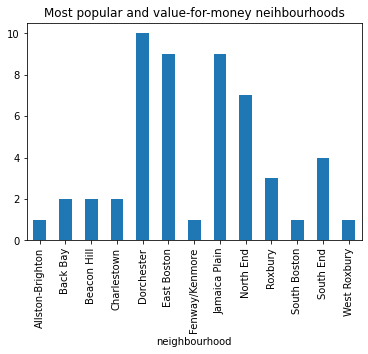

In [72]:
#count number of listing for each neighbourhood from the above code cell
status_vals = top_neighbourhoods_listings_byvalue.groupby('neighbourhood')['id'].count()
(status_vals).plot(kind="bar");
plt.title("Most popular and value-for-money neihbourhoods");

##**Business Question 4:What is the best type of rooms in each neighbourhood?**

To solve this question, we firstly filter the listings with rating value grater than 95 to get the topmost rated listings. Then, the data id grouped by neighbourhoods with count of room types. Further the data is untacked and the room type with maximum counts is taken out.

####***Final result for Business Question 4:***

In [70]:
best_room_types_in_neighbourhood=pd.DataFrame({'Best Room Type':df.query("review_scores_rating>95").groupby('neighbourhood')['room_type'].value_counts().unstack().idxmax(axis=1)})
best_room_types_in_neighbourhood

,Best Room Type
neighbourhood,
Allston-Brighton,Private room
Back Bay,Entire home/apt
Beacon Hill,Entire home/apt
Brookline,Private room
Charlestown,Entire home/apt
Chestnut Hill,Private room
Chinatown,Entire home/apt
Dorchester,Private room
Downtown,Entire home/apt
